In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
import numpy as np

In [3]:
# Reading in 2016 property information
df_properties = pd.read_csv('/content/drive/MyDrive/properties_2016.csv')

# Reading in 2016 and 2017 transaction data and the sample submission file
df_2016 = pd.read_csv('/content/drive/MyDrive/train_2016_v2.csv', parse_dates=["transactiondate"])
df_2017 = pd.read_csv('/content/drive/MyDrive/train_2017.csv', parse_dates=["transactiondate"])
sample = pd.read_csv('/content/drive/MyDrive/sample_submission.csv')

<ipython-input-3-c3931c281adc>:2: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  df_properties = pd.read_csv('/content/drive/MyDrive/properties_2016.csv')


In [4]:
# Merging the 2016 and 2017 transaction data
df_logs = pd.concat([df_2016, df_2017])

# Merging the new transaction data with it's associated properties
df_train = pd.merge(df_logs, df_properties, on='parcelid', how='inner')

In [5]:
# Dropping all rows where there is no longitude or latitidue data
df_final = df_train[~df_train.regionidcounty.isnull()]

In [6]:
# Determining missing values in each feature
df_final.isna().sum()

,0
parcelid,0
logerror,0
transactiondate,0
airconditioningtypeid,114065
architecturalstyletypeid,167296
basementsqft,167671
bathroomcnt,0
bedroomcnt,0
buildingclasstypeid,167733
buildingqualitytypeid,60627


In [7]:
# Want to use taxvaluedollarcnt, and since only 1 value is missing, will just drop that row
df_final = df_final.drop(df_final[df_final.taxvaluedollarcnt.isnull()].index)
df_final

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.027600,2016-01-01,1.0,NaN,NaN,2.0,3.0,NaN,4.0,...,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,14366692,-0.168400,2016-01-01,NaN,NaN,NaN,3.5,4.0,NaN,NaN,...,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,14366692,0.002142,2017-08-04,NaN,NaN,NaN,3.5,4.0,NaN,NaN,...,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
3,12098116,-0.004000,2016-01-01,1.0,NaN,NaN,3.0,2.0,NaN,4.0,...,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
4,12643413,0.021800,2016-01-02,1.0,NaN,NaN,2.0,2.0,NaN,4.0,...,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167883,10833991,-0.002245,2017-09-20,1.0,NaN,NaN,3.0,3.0,NaN,4.0,...,NaN,NaN,143178.0,203793.0,2015.0,60615.0,4685.34,NaN,NaN,6.037132e+13
167884,11000655,0.020615,2017-09-20,NaN,NaN,NaN,2.0,2.0,NaN,7.0,...,NaN,NaN,69852.0,349295.0,2015.0,279443.0,4478.43,NaN,NaN,6.037101e+13
167885,17239384,0.013209,2017-09-21,NaN,NaN,NaN,2.0,4.0,NaN,NaN,...,1.0,NaN,49923.0,66198.0,2015.0,16275.0,1065.18,NaN,NaN,6.111008e+13
167886,12773139,0.037129,2017-09-21,1.0,NaN,NaN,1.0,3.0,NaN,7.0,...,NaN,NaN,32305.0,48803.0,2015.0,16498.0,876.43,NaN,NaN,6.037434e+13


In [8]:
# Getting column names of all columns w/o any missing values, and dropping parcelid
selected = df_final.columns[df_final.apply(lambda c: c.isnull().sum() == 0)]

# Getting selected columns
data = df_final[selected]

In [9]:
# Changing transactiondate to a datetime type
data['transactiondate'] = pd.to_datetime(data['transactiondate'])

# Extracting year and month based on the transaction date and setting them as
# separate variables
data['year'] = data['transactiondate'].dt.year

# Setting train data to be all 2016 transactions
X_train = data[data['year'] != 2017]
y_train = X_train['logerror']
# Dropping logerror (outcome variable), transactiondate (represented by month and day),
# year and assessment year (since all observations in this subset have the same year value)
X_train = X_train.drop(['parcelid', 'logerror', 'transactiondate', 'year', 'assessmentyear', 'fips'], axis=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Standardizing all features in X_train, X_val, and X_test
X_train_std = (X_train-X_train.mean())/X_train.std()
X_val_std = (X_val-X_train.mean())/X_train.std()

# Standardizing Y_train, Y_val, and Y_test
y_train_std = (y_train-y_train.mean())/y_train.std()
y_val_std = (y_val-y_train.mean())/y_train.std()

def build_model(num_features, learning_rate):
  """Build a TF linear regression model using Keras.

  Args:
    num_features: The number of input features.
    learning_rate: The desired learning rate for SGD.

  Returns:
    model: A tf.keras model (graph).
  """
  # This is not strictly necessary, but each time you build a model, TF adds
  # new nodes (rather than overwriting), so the colab session can end up
  # storing lots of copies of the graph when you only care about the most
  # recent. Also, as there is some randomness built into training with SGD,
  # setting a random seed ensures that results are the same on each identical
  # training run.
  tf.keras.backend.clear_session()
  tf.random.set_seed(42)

  # Build a model using keras.Sequential. While this is intended for neural
  # networks (which may have multiple layers), we want just a single layer for
  # linear regression.
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Dense(
      units=1,        # output dim
      input_shape=[num_features],  # input dim
      use_bias=True,               # use a bias (intercept) param
      kernel_initializer=tf.ones_initializer,  # initialize params to 1
      bias_initializer=tf.ones_initializer,    # initialize bias to 1
  ))

  # We need to choose an optimizer
  optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate)

  # Finally, compile the model. This finalizes the graph for training.
  # We specify the loss and the optimizer above
  model.compile(
        optimizer=optimizer,
        loss='mae'
  )

  return model

<ipython-input-9-2d03f14c6d79>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['transactiondate'] = pd.to_datetime(data['transactiondate'])
<ipython-input-9-2d03f14c6d79>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['year'] = data['transactiondate'].dt.year


Learned model parameters: [array([[ 0.03051177],
       [-0.00418268],
       [-0.01302096],
       [ 0.01100789],
       [-0.00126367],
       [ 0.00834014],
       [ 0.01405813],
       [ 0.0048454 ],
       [ 0.00423804]], dtype=float32), array([-0.03043609], dtype=float32)]

Final epoch loss on training data: 0.42159202694892883

Final epoch loss on validation data: 0.41542813181877136

Percentage difference between the losses: [107.83332407  10.19931454   1.61157101   1.43454346   1.46357774
   1.41280903   1.47905899   1.52392553   1.51810076   1.48374524]


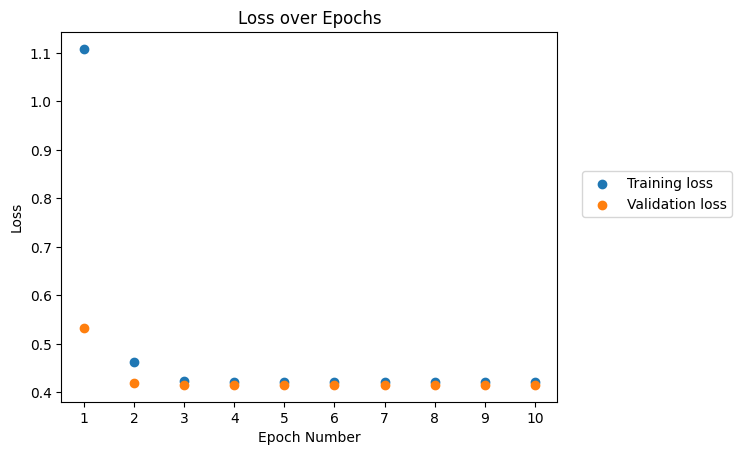

In [10]:
# Build and compile test_model
test_model = build_model(num_features=X_train.shape[1],learning_rate=0.0007)

# Fit test model
test_num_epochs=10
test_train_tf = test_model.fit(x=X_train_std, y=y_train_std, epochs=test_num_epochs, verbose=0,
                         validation_data=(X_val_std, y_val_std))

# Plotting losses of test model
plt.scatter(np.arange(1, test_num_epochs+1), test_train_tf.history['loss'], label="Training loss")
plt.scatter(np.arange(1, test_num_epochs+1), test_train_tf.history['val_loss'], label="Validation loss")
plt.xticks(np.arange(1, test_num_epochs+1, 1))
plt.xlabel("Epoch Number")
plt.ylabel("Loss")
plt.title("Loss over Epochs")
plt.legend(loc=(1.05, 0.5))

# Printing out learned model parameters, final epoch loss for training
# and validation data, and percentage difference between
# losses on training and validation data
print("Learned model parameters:", test_model.layers[0].get_weights())
print("\nFinal epoch loss on training data:", test_train_tf.history['loss'][-1])
print("\nFinal epoch loss on validation data:", test_train_tf.history['val_loss'][-1])
print("\nPercentage difference between the losses:",
 ((np.array(test_train_tf.history['loss']) - np.array(test_train_tf.history['val_loss']))
 / np.array(test_train_tf.history['val_loss'])) * 100)

**After around 50 experiments, found best model was as follows:**
*   learning_rate=0.007
*   num_epochs=10
*   optimizer='Adam'





In [11]:
# Using sample submission to make test data for predictions for Kaggle submission
X_test = data[data['parcelid'].isin(sample['ParcelId'])]
sample['parcelid'] = sample['ParcelId']
X_test = sample.merge(df_properties, on='parcelid', how='inner')

# Getting number of rows with missing data
num_missing = X_test[X_test[X_train.columns].isnull().any(axis=1)].shape[0]

# Dropping rows with missing data
X_test = X_test[X_train.columns].dropna()

In [13]:
# Scaling the train and validation data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Creating predications based on the training and validation datasets
train_preds = test_model.predict(X_train_scaled)
val_preds = test_model.predict(X_val_scaled)

# Printing out training and validation dataset mean absolute errors
print("Train MAE:", mean_absolute_error(y_train, train_preds))
print("Validation MAE:", mean_absolute_error(y_val, val_preds))

565/565 [==============================] - 1s 1ms/step
Train MAE: 0.0829004389358951
Validation MAE: 0.08181866026138399


In [14]:
# Scaling test data and making predictions
X_test_scaled = scaler.transform(X_test)
test_preds = test_model.predict(X_test_scaled)

# Getting average of predictions
average_preds = np.mean(test_preds)

# Printing out mean absolute error between actual test data and test predictions
y_test = df_logs['logerror']
print("Test MAE:", mean_absolute_error(y_test, test_preds[len(test_preds)-len(y_test):]))

91958/91958 [==============================] - 101s 1ms/step
Test MAE: 0.08669028368660582


In [ ]:
# Replacing missing predictions with average of test data predictions
for i in range(num_missing):
  test_preds = np.append(test_preds, average_preds)

# Create submission file
sub = pd.read_csv('/content/drive/MyDrive/sample_submission.csv')
for c in sub.columns[sub.columns != 'ParcelId']:
  sub[c] = test_preds

sub.to_csv('mlr_starter.csv', index=False, float_format='%.4f')